In [1]:
import pandas as pd

# DataFrame:

Arreglos de datos multidimensionales con propiedades similares a los de las series

In [2]:
df = pd.DataFrame([[909976, "Sweden"],[8615246, "United Kingdom"],[2872086, "Italy"],[2273305, "France"]])
df

,0,1
0,909976,Sweden
1,8615246,United Kingdom
2,2872086,Italy
3,2273305,France


In [14]:
df.columns = ["Population", "Country"]
df.index = ["Stockholm", "London", "Rome", "Paris"]
df

,Population,Country
Stockholm,909976,Sweden
London,8615246,United Kingdom
Rome,2872086,Italy
Paris,2273305,France


In [17]:
dafr = pd.DataFrame([[909976, "Sweden"],[8615246, "United Kingdom"],[2872086, "Italy"],[2273305, "France"]],index=["Stockholm", "London", "Rome", "Paris"],columns=["Population", "Country"])
dafr


,Population,Country
Stockholm,909976,Sweden
London,8615246,United Kingdom
Rome,2872086,Italy
Paris,2273305,France


In [19]:
dafr.sort_index()

,Population,Country
London,8615246,United Kingdom
Paris,2273305,France
Rome,2872086,Italy
Stockholm,909976,Sweden


Para acceder a una columna:

In [7]:
df.Population

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

...o bien:

In [6]:
df["Population"]

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

Para acceder a una fila:

In [8]:
#df.ix["Stockholm"]  deprecated
df.loc["Stockholm"]

Population    909976
Country       Sweden
Name: Stockholm, dtype: object

...o a dos en una sola vez, para formar un dataframe más pequeño:

In [8]:
df.loc[["Stockholm","Paris"]]

,Population,Country
Stockholm,909976,Sweden
Paris,2273305,France


In [9]:
df.loc[["Stockholm","Paris"],"Country"]

Stockholm    Sweden
Paris        France
Name: Country, dtype: object


Se puede calcular la estadística descriptiva de la muestra organizada en un dataframe con los mismo métodos vistos para las series. En el caso de dataframes estos se ejecutan sobre las columnas con valores numéricos:

In [10]:
df.mean()

Population    3667653.25
dtype: float64

# También se pueden construir DataFrames a partir de diccionarios cuyas entradas sean arrays o listas, las cuales son colocadas como columnas

In [10]:
Dic={'estado':['Puebla','Tlaxcala','Oaxaca','Guerrero','Morelos'], 'poblacion':[6371381,1272847,3967889,3533251,1903811]}
df=pd.DataFrame(Dic)
df

,estado,poblacion
0,Puebla,6371381
1,Tlaxcala,1272847
2,Oaxaca,3967889
3,Guerrero,3533251
4,Morelos,1903811


# Insertar una nueva columna

In [11]:
posicion= 1 
nombre_col= 'capital'
datos_col = ['Puebla','Tlaxcala','Oaxaca','Chilpancingo','Cuernavaca']
df.insert(posicion, nombre_col, datos_col)
df

,estado,capital,poblacion
0,Puebla,Puebla,6371381
1,Tlaxcala,Tlaxcala,1272847
2,Oaxaca,Oaxaca,3967889
3,Guerrero,Chilpancingo,3533251
4,Morelos,Cuernavaca,1903811


# cambiar el tipo de datos en una columna 

In [14]:
df['poblacion'].astype(int)

0    6371381
1    1272847
2    3967889
3    3533251
4    1903811
Name: poblacion, dtype: int64

In [14]:
type(df['poblacion'])

pandas.core.series.Series

# Aplicar una función a una columna (serie) usando map 

In [15]:
df['capital'].map(lambda element: element.upper())

0          PUEBLA
1        TLAXCALA
2          OAXACA
3    CHILPANCINGO
4      CUERNAVACA
Name: capital, dtype: object

# Crear o sustituir una columna a partir de operar los elementos de una ya existente

In [16]:
df['mitad poblacion']=df['poblacion'].map(lambda x: x/2)
df['capital']=df['capital'].map(lambda element: element.upper())
suma=df['poblacion'].sum()
df['fraccion poblacional']=df['poblacion'].map(lambda x: x/suma)

In [17]:
df

,estado,capital,poblacion,mitad poblacion,fraccion poblacional
0,Puebla,PUEBLA,6371381,3185690.5,0.373706
1,Tlaxcala,TLAXCALA,1272847,636423.5,0.074657
2,Oaxaca,OAXACA,3967889,1983944.5,0.232732
3,Guerrero,CHILPANCINGO,3533251,1766625.5,0.207239
4,Morelos,CUERNAVACA,1903811,951905.5,0.111666


# Aplicar una función a varias columnas usando apply()

In [19]:
import numpy as np
df2=df[["mitad poblacion","fraccion poblacional"]]

In [23]:
df2.apply(lambda x: x.astype(int))

,mitad poblacion,fraccion poblacional
0,3185690,0
1,636423,0
2,1983944,0
3,1766625,0
4,951905,0


# Primero creamos un DataFrame con entradas aleatorias distribuidas normalmente

In [24]:
df = pd.DataFrame({
    'x': np.random.normal(loc=0.0, scale=1.0, size=100),'y': np.random.normal(loc=4.0, scale=19.0, size=100)})

In [25]:
%time
df['x'].map(lambda var: var*0.1)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.58 µs


0    -0.114895
1     0.040964
2     0.097041
3     0.095342
4     0.088991
        ...   
95   -0.048973
96   -0.033686
97   -0.055357
98   -0.065084
99    0.079765
Name: x, Length: 100, dtype: float64

In [27]:
%time
df.apply(lambda var: var*0.1)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.2 µs


,x,y
0,-0.114895,-0.695360
1,0.040964,-0.938646
2,0.097041,-1.166134
3,0.095342,-1.617859
4,0.088991,-0.153443
...,...,...
95,-0.048973,2.255877
96,-0.033686,4.587528
97,-0.055357,0.391656
98,-0.065084,-1.731247


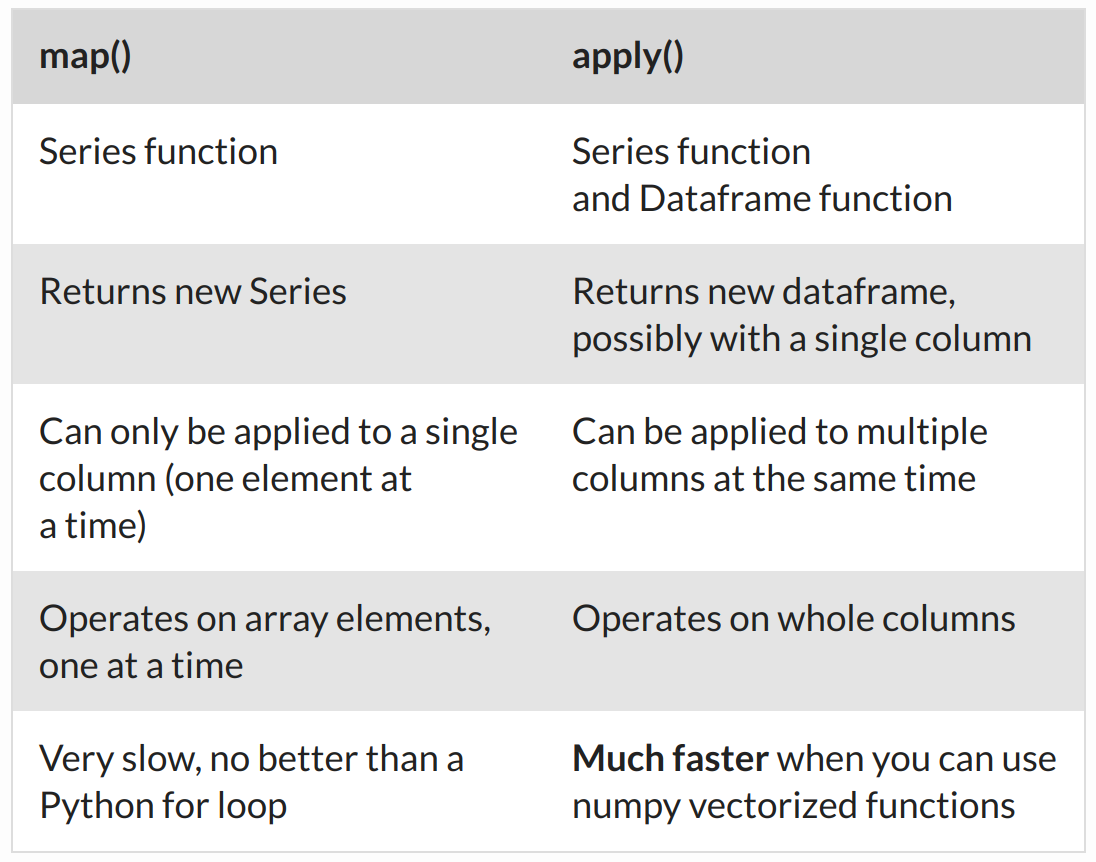

In [23]:
from IPython.display import Image
Image('MapVSApply.png',width=500, height=500)